In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, cophenet
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler
from collections import Counter
import pandas as pd
import scipy

In [46]:
mat_data = scipy.io.loadmat('data_clusters.mat')
# Assuming mat_data is the dictionary loaded from the .mat file
# Extract the array 'X'
#print(mat_data)
X_data = mat_data['X']

# Convert the NumPy array to a pandas DataFrame
df = pd.DataFrame(X_data, columns=['x', 'y']) # You can name the columns appropriately

# Display the first few rows of the DataFrame
display(df.head())

,x,y
0,351,162
1,181,100
2,483,345
3,302,167
4,422,108


In [57]:
scaler = StandardScaler()
df[['x', 'y']] = scaler.fit_transform(df[['x', 'y']]) 

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       136 non-null    float64
 1   y       136 non-null    float64
dtypes: float64(2)
memory usage: 2.3 KB


In [49]:
df.describe()

,x,y
count,1.360000e+02,1.360000e+02
mean,1.012262e-16,1.208184e-16
std,1.003697e+00,1.003697e+00
min,-1.860558e+00,-1.731489e+00
25%,-9.477500e-01,-6.658471e-01
50%,1.775814e-01,-3.154992e-01
75%,8.238631e-01,8.815229e-01
max,1.623441e+00,1.742795e+00


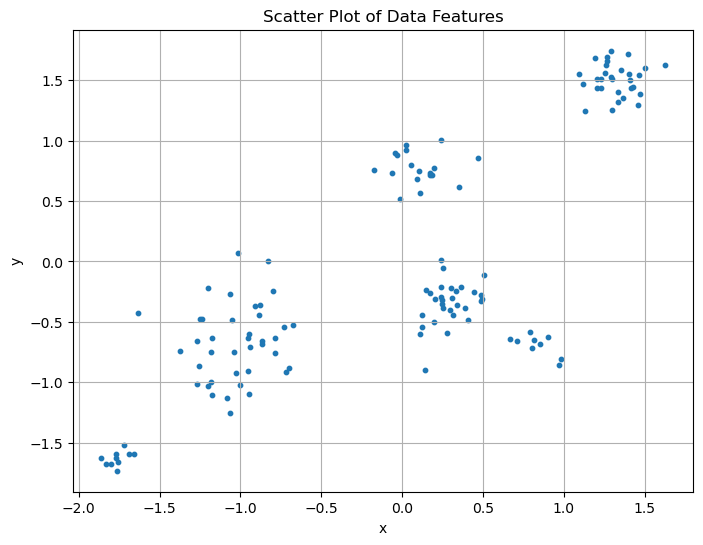

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['y'], s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of Data Features')
plt.grid(True)
plt.show()

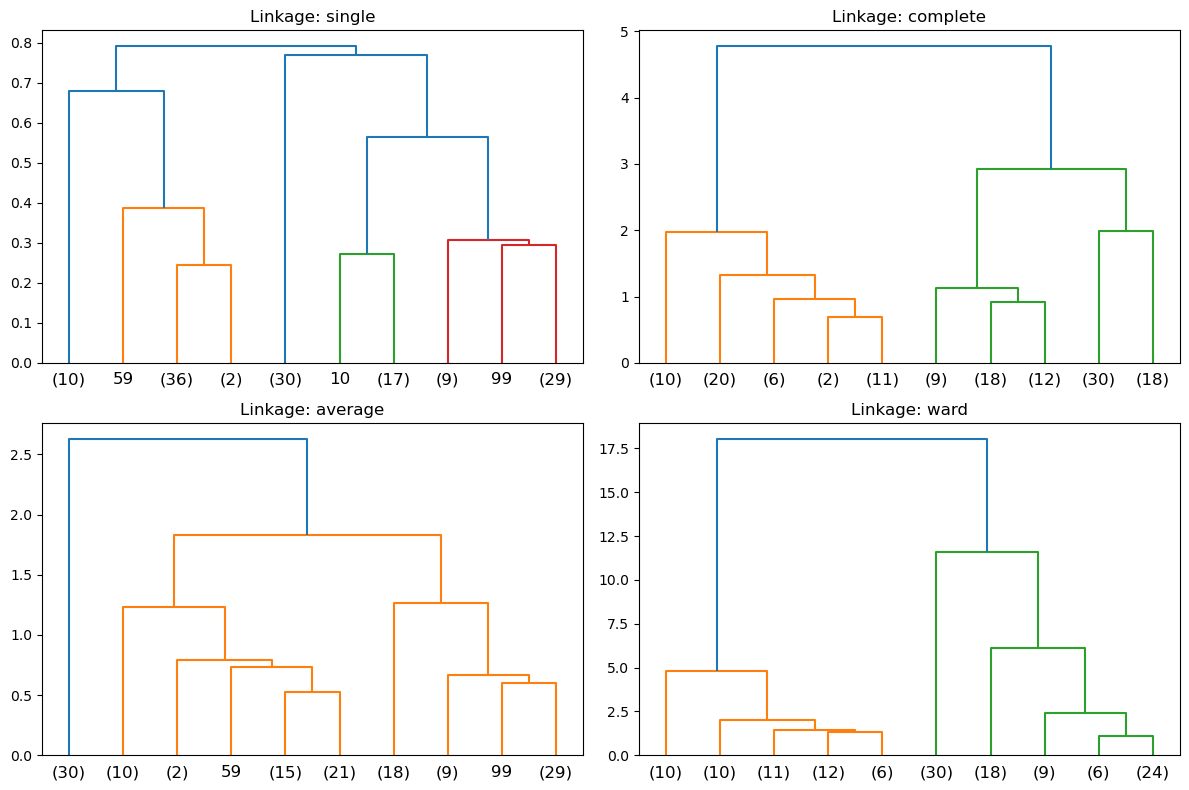

In [51]:
# Dataset simulado
X, y = make_blobs(n_samples=20, centers=3, random_state=42, cluster_std=1.2)

# Diferentes criterios de enlace
methods = ["single", "complete", "average", "ward"]

plt.figure(figsize=(12,8))
for i, method in enumerate(methods, 1):
    Z = linkage(df, method=method)
    plt.subplot(2,2,i)
    dendrogram(Z, truncate_mode="lastp", p=10)
    plt.title(f"Linkage: {method}")
plt.tight_layout()
plt.show()


In [35]:

# Dataset compacto (blobs)
Xb, _ = make_blobs(n_samples=20, centers=3, cluster_std=1.0, random_state=7)

# Dataset alargado/no convexo (lunas)
Xm, _ = make_moons(n_samples=20, noise=0.06, random_state=7)

# Distancias por pares (euclídea)
Db = squareform(pdist(df, metric="euclidean"))
Dm = squareform(pdist(df, metric="euclidean"))

Db[:6,:6], Dm[:6,:6]

(array([[0.        , 1.32937763, 2.00442453, 0.34488178, 0.721754  ,
         2.63512655],
        [1.32937763, 0.        , 3.18012124, 1.06584036, 1.68109101,
         1.31449976],
        [2.00442453, 3.18012124, 0.        , 2.14276081, 2.3452954 ,
         4.47339355],
        [0.34488178, 1.06584036, 2.14276081, 0.        , 1.014321  ,
         2.38016496],
        [0.721754  , 1.68109101, 2.3452954 , 1.014321  , 0.        ,
         2.86921424],
        [2.63512655, 1.31449976, 4.47339355, 2.38016496, 2.86921424,
         0.        ]]),
 array([[0.        , 1.32937763, 2.00442453, 0.34488178, 0.721754  ,
         2.63512655],
        [1.32937763, 0.        , 3.18012124, 1.06584036, 1.68109101,
         1.31449976],
        [2.00442453, 3.18012124, 0.        , 2.14276081, 2.3452954 ,
         4.47339355],
        [0.34488178, 1.06584036, 2.14276081, 0.        , 1.014321  ,
         2.38016496],
        [0.721754  , 1.68109101, 2.3452954 , 1.014321  , 0.        ,
         2.86921424

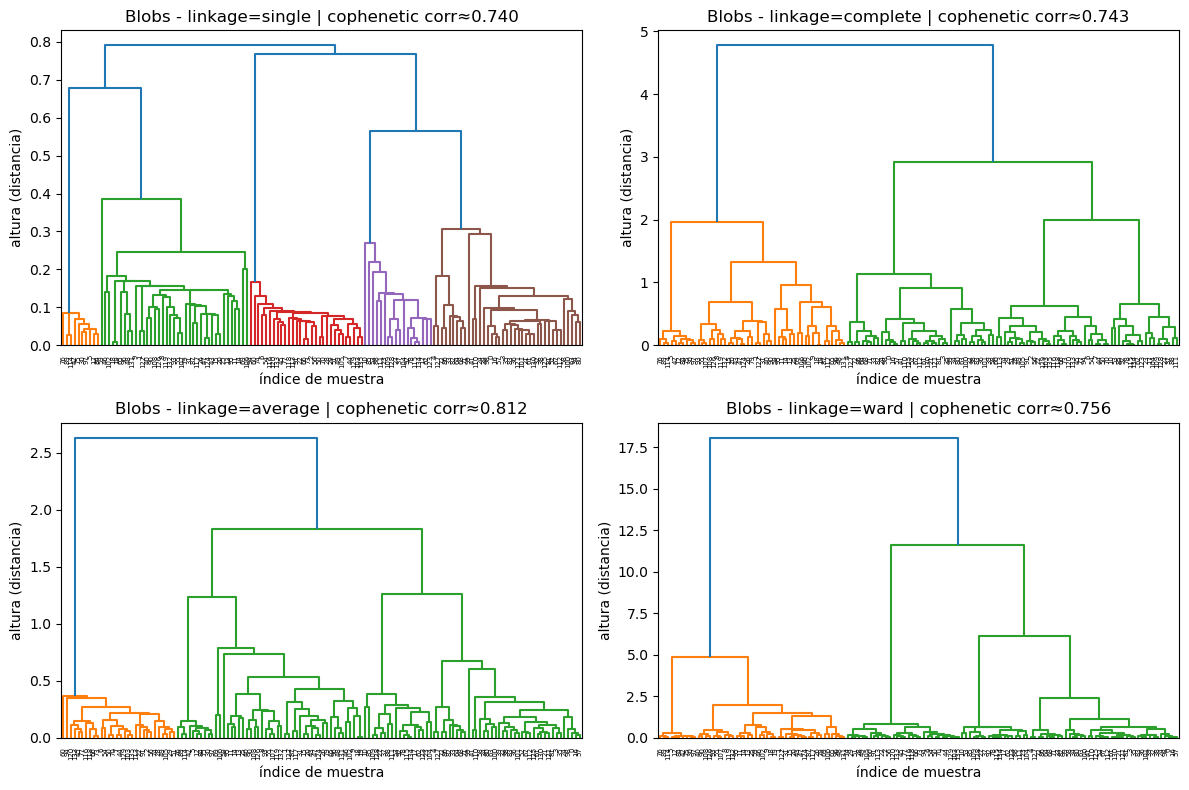

single primeras filas de Z:
 [[1.80000000e+01 1.90000000e+01 6.96799677e-03 2.00000000e+00]
 [1.15000000e+02 1.34000000e+02 6.96799677e-03 2.00000000e+00]
 [6.60000000e+01 7.30000000e+01 1.69976922e-02 2.00000000e+00]
 [7.80000000e+01 1.37000000e+02 1.94637740e-02 3.00000000e+00]
 [4.70000000e+01 1.24000000e+02 1.94637740e-02 2.00000000e+00]]
complete primeras filas de Z:
 [[1.80000000e+01 1.90000000e+01 6.96799677e-03 2.00000000e+00]
 [1.15000000e+02 1.34000000e+02 6.96799677e-03 2.00000000e+00]
 [6.60000000e+01 7.30000000e+01 1.69976922e-02 2.00000000e+00]
 [4.70000000e+01 1.24000000e+02 1.94637740e-02 2.00000000e+00]
 [1.60000000e+01 5.70000000e+01 2.06734486e-02 2.00000000e+00]]
average primeras filas de Z:
 [[1.80000000e+01 1.90000000e+01 6.96799677e-03 2.00000000e+00]
 [1.15000000e+02 1.34000000e+02 6.96799677e-03 2.00000000e+00]
 [6.60000000e+01 7.30000000e+01 1.69976922e-02 2.00000000e+00]
 [4.70000000e+01 1.24000000e+02 1.94637740e-02 2.00000000e+00]
 [7.80000000e+01 1.3700000

In [54]:
# Crear una figura para los dendrogramas
plt.figure(figsize=(12,8))
Z_dict = {}  # Diccionario para almacenar los resultados

for i, method in enumerate(methods, 1):
    Z = linkage(df, method=method, metric="euclidean")
    Z_dict[method] = Z  # Guardar Z para usar después
    coph_corr, coph_dists = cophenet(Z, pdist(df))
    
    plt.subplot(2,2,i)
    dendrogram(Z, labels=np.arange(len(df)))
    plt.title(f"Blobs - linkage={method} | cophenetic corr≈{coph_corr:.3f}")
    plt.xlabel("índice de muestra")
    plt.ylabel("altura (distancia)")

plt.tight_layout()
plt.show()

# Imprimir las primeras fusiones para cada método fuera del bucle
for method in methods:
    print(method, "primeras filas de Z:\n", Z_dict[method][:5])

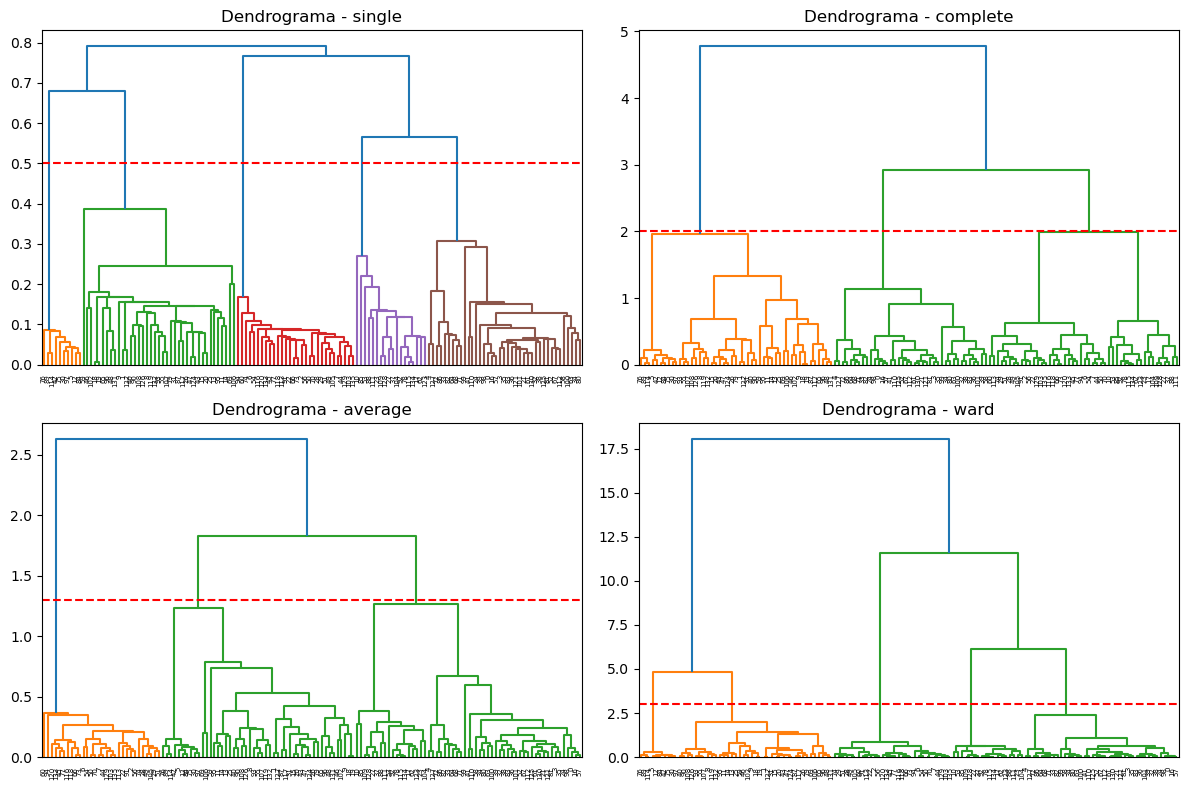

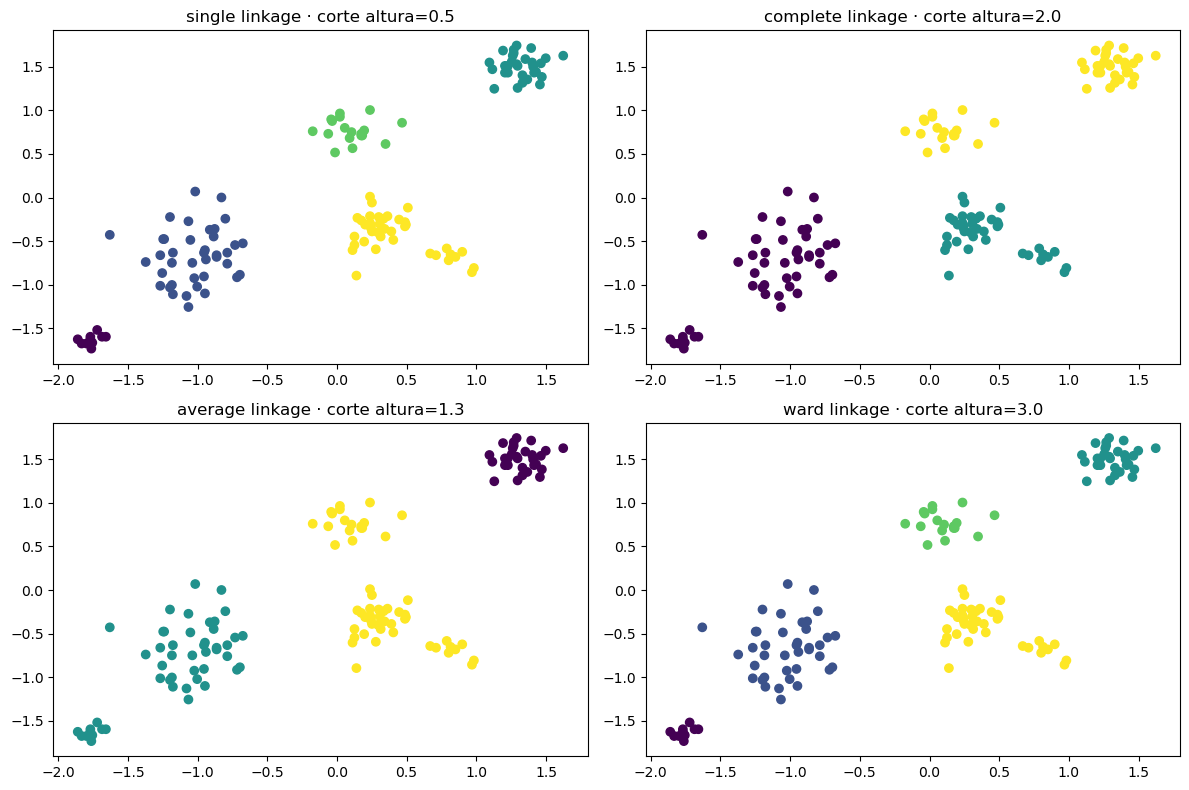

In [43]:
# Dataset lunas
X, _ = make_moons(n_samples=200, noise=0.08, random_state=7)

methods = ["single", "complete", "average", "ward"]
cut_heights = {"single":0.5, "complete":2.0, "average":1.3, "ward":3.0}  # cortes aproximados

# Dendrogramas
plt.figure(figsize=(12,8))
for i, m in enumerate(methods,1):
    Z = linkage(df, method=m)
    plt.subplot(2,2,i)
    dendrogram(Z)
    plt.axhline(cut_heights[m], color="r", ls="--")
    plt.title(f"Dendrograma - {m}")
plt.tight_layout(); plt.show()

# Dispersión coloreada
plt.figure(figsize=(12,8))
for i, m in enumerate(methods,1):
    Z = linkage(df, method=m)
    labels = fcluster(Z, t=cut_heights[m], criterion="distance")
    plt.subplot(2,2,i)
    plt.scatter(df['x'], df['y'], c=labels)
    plt.title(f"{m} linkage · corte altura={cut_heights[m]}")
plt.tight_layout()
plt.show()

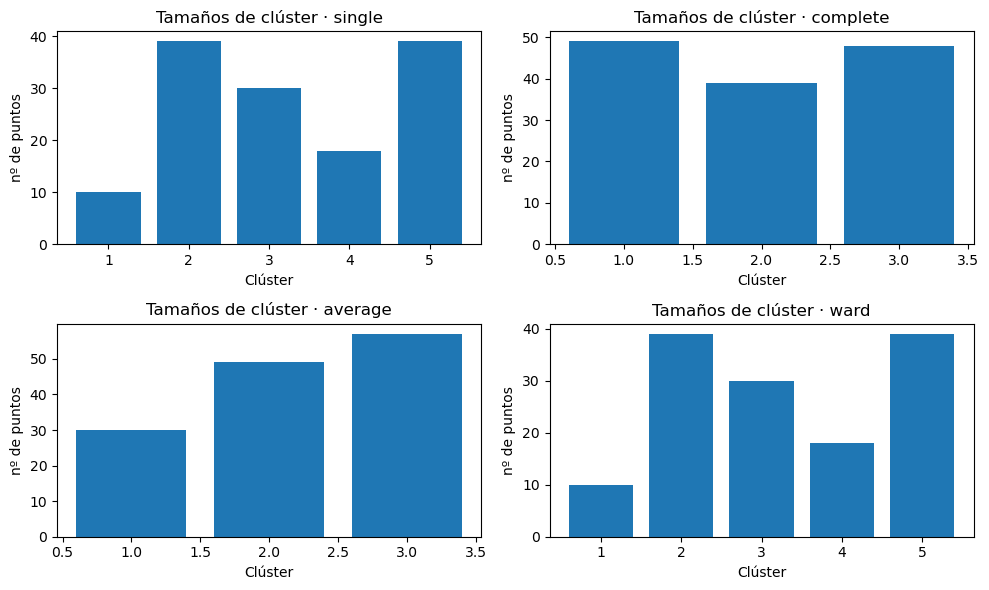

In [58]:
# Dataset lunas
X, _ = make_moons(n_samples=200, noise=0.08, random_state=7)

methods = ["single", "complete", "average", "ward"]
cut_heights = {"single":0.5, "complete":2.0, "average":1.3, "ward":3.0}

plt.figure(figsize=(10,6))
for i, m in enumerate(methods,1):
    Z = linkage(df, method=m)
    labels = fcluster(Z, t=cut_heights[m], criterion="distance")
    counts = Counter(labels)
    
    plt.subplot(2,2,i)
    plt.bar(counts.keys(), counts.values())
    plt.title(f"Tamaños de clúster · {m}")
    plt.xlabel("Clúster"); plt.ylabel("nº de puntos")
plt.tight_layout(); plt.show()

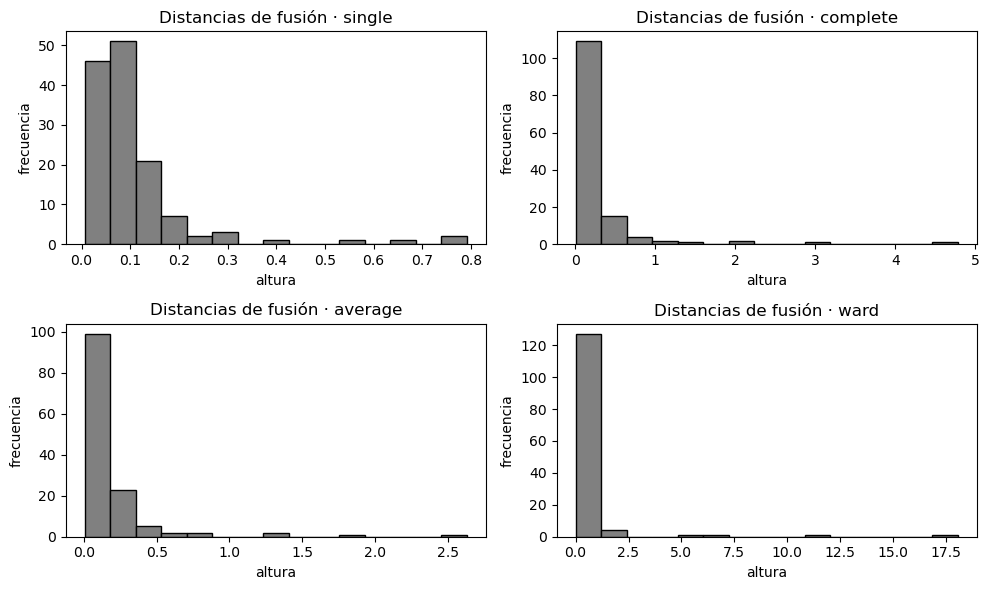

In [42]:
plt.figure(figsize=(10,6))
for i, m in enumerate(methods,1):
    Z = linkage(df, method=m)
    heights = Z[:,2]
    
    plt.subplot(2,2,i)
    plt.hist(heights, bins=15, color="gray", edgecolor="black")
    plt.title(f"Distancias de fusión · {m}")
    plt.xlabel("altura"); plt.ylabel("frecuencia")
plt.tight_layout(); plt.show()